In [12]:
import pandas as pd
df_links = pd.read_csv("./sample_100knocks/サンプルコード_20200325/8章/links.csv")
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


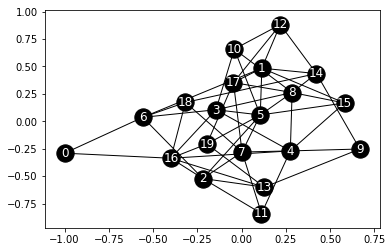

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

#グラフオブジェクトの作成
G = nx.Graph()

#頂点の設定
NUM = len(df_links.index)
for i in range(1, NUM):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

#辺の設定
for i in range(NUM):
    for j in range(NUM):
        if df_links.iloc[i][j] == 1:
            G.add_edge(str(i), str(j))

#描画
nx.draw_networkx(G, node_color="k", edge_color="k", font_color="w")
plt.show()

In [31]:
import numpy as np

def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else:
        return 0

def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j]=1
    return list_active

percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

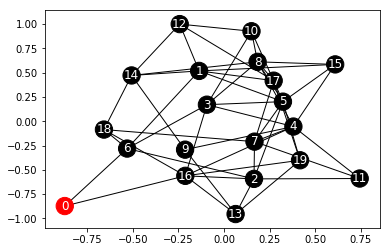

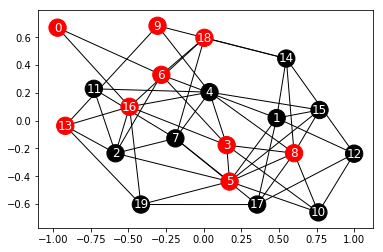

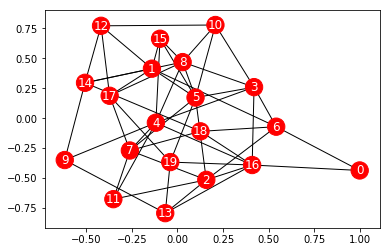

In [32]:
def active_node_coloring(list_active):
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    return list_color

t =  0
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

t = 30
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

t = 99
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeSeries[t]))
plt.show()


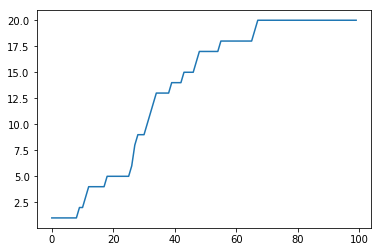

In [33]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
plt.plot(list_timeSeries_num)
plt.show()

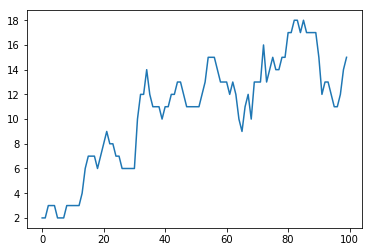

In [40]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
    #拡散
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j]=1
    #消滅
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []

for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

#時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xyicks'

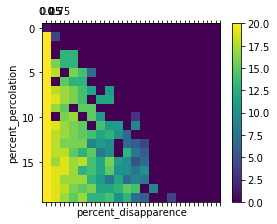

In [41]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05 * i_p
        percent_disapparence = 0.05 * i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)

plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel("percent_disapparence")
plt.ylabel("percent_percolation")
plt.xticks(np.arange(0.0, 20.0, 0.5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 0.5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False, left=False, right=False, top=False)

plt.show()

In [42]:
df_mem_links = pd.read_csv("./sample_100knocks/サンプルコード_20200325/8章/links_members.csv")
df_mem_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [43]:
df_mem_info = pd.read_csv("./sample_100knocks/サンプルコード_20200325/8章/info_members.csv")
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


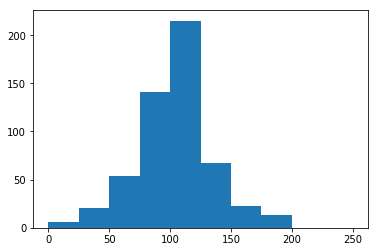

In [45]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])

plt.hist(array_linkNum, bins=10, range=(0, 250))
plt.show()

In [47]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1
#消滅の確率推定
count_active = 0
count_active_to_inactive = 0
for t in range(1, T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i][t+1]==0):
                count_active += 1
estimated_percent_disapparence = count_active/count_active_to_inactive

#拡散の確率推定
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1]
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link += 1
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==0):
                    if (temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

c
estimated_percent_percolation

0.019205360513401284

In [50]:
estimated_percent_disapparence

0.10147163541419416

In [ ]:
percent_percolation = 0.019205360513401284
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
    list_timeSeries.append(list_active.copy())

list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0, T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))
    
plt.plot(list_timeSeries_num, label = "simulated")
plt.plot(list_timeSeries_num_real, label = "real")
plt.xlabel("month")
plt.ylabel("population")
plt.legend(loc="lower right")
plt.show()